In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from os import listdir

from keras import models
from keras import layers

from sklearn.metrics import confusion_matrix #, f1_score
# np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [80]:
!pwd

/Users/Rich/Desktop/Flatiron/Final/breed-classifcation


In [148]:
# get all the data in the directory split/test, and reshape them
data_all = ImageDataGenerator(rescale = 1./225).flow_from_directory( 
        './data', 
        target_size=(224, 224), 
        batch_size = 532,
        classes = ['jindo','shiba'],
        class_mode = 'binary'
) 

Found 532 images belonging to 2 classes.


In [149]:
images, labels = next(data_all)

In [127]:
print('Number of images: {} and labels: {}'.format(len(images), len(labels)))

Number of images: 532 and labels: 532


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x1a4c150050>, 0.0)

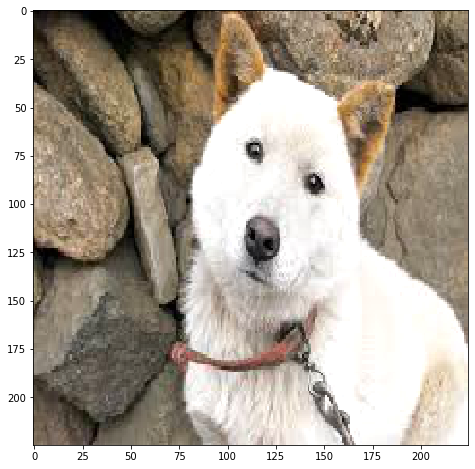

In [128]:
i = 11
plt.imshow(images[i]) ,labels[i] #1 = shiba

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


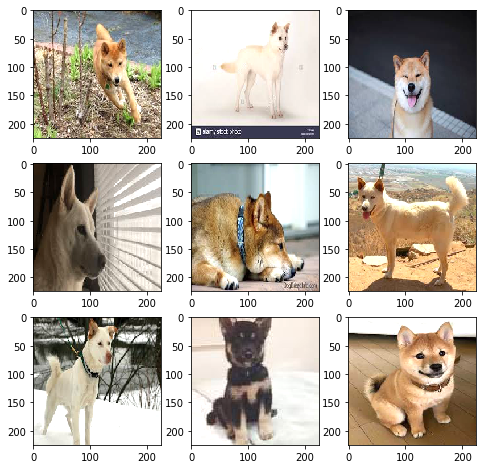

In [129]:
#plot with matplotlib
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(images[i])
plt.show()

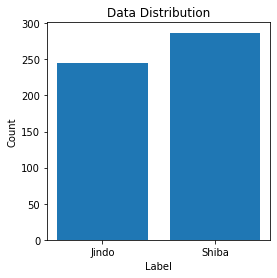

In [130]:
fig, ax = plt.subplots(figsize = (4,4))

#find all indexes with a value of 0 and use the first value of the returned tuple
#taking the length gives the number of indexes with value 0
num_jindo = len(np.where(labels == 0)[0]) 
num_shiba = len(np.where(labels == 1)[0])

ax.bar(['Jindo','Shiba'],[num_jindo,num_shiba])
plt.title('Data Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

In [131]:
num_jindo, num_shiba

(245, 287)

### Image Generation

In [132]:
img_gen1 = ImageDataGenerator(rescale=1./255, 
                             rotation_range=340,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              shear_range=0.2,
#                              zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode= 'reflect')

data_generatation_1 = img_gen1.flow_from_directory( 
        './data', 
        target_size=(224, 224), 
        batch_size = 532,
        classes = ['jindo','shiba'],
        class_mode = 'binary'
) 

images_gen1, labels_gen1 = next(data_generatation_1)

Found 532 images belonging to 2 classes.


In [134]:
img_gen2 = ImageDataGenerator(rescale=1./255, 
                             rotation_range=20,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              shear_range=0.2,
#                              zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode= 'reflect')

data_generatation_2 = img_gen2.flow_from_directory( 
        './data', 
        target_size=(224, 224), 
        batch_size = 532,
        classes = ['jindo','shiba'],
        class_mode = 'binary'
) 
images_gen2, labels_gen2 = next(data_generatation_2)

Found 532 images belonging to 2 classes.


In [135]:
img_gen3 = ImageDataGenerator(rescale=1./255, 
                             rotation_range=340,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode= 'reflect')

data_generation_3 = img_gen3.flow_from_directory( 
        './data', 
        target_size=(224, 224), 
        batch_size = 532,
        classes = ['jindo','shiba'],
        class_mode = 'binary'
)

images_gen3, labels_gen3 = next(data_generation_3)

Found 532 images belonging to 2 classes.


In [152]:
images = np.concatenate([images,images_gen1,images_gen2,images_gen3])
labels = np.concatenate([labels,labels_gen1,labels_gen2,labels_gen3])

In [155]:
len(images), len(labels)

(2128, 2128)

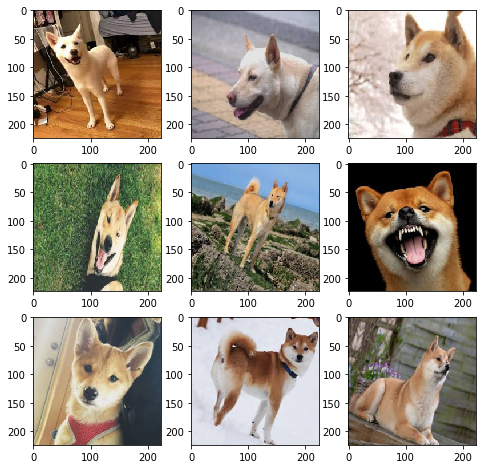

In [154]:
#plot with matplotlib
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(images_gen[i])
plt.show()

### Train Test Split

In [157]:
#split data into model set and test set
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [158]:
#split model set into train and testing
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [159]:
labels[:5] , labels[-5:]

(array([0., 1., 0., 1., 0.], dtype=float32),
 array([1., 0., 1., 0., 0.], dtype=float32))

In [160]:
X_train.shape

(1361, 224, 224, 3)

### Apply Smote

In [98]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

ValueError: Found array with dim 4. Estimator expected <= 2.

<b> CNN model 1

In [161]:
cnn = models.Sequential()

#feature learning
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.MaxPooling2D((2, 2)))
# cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
# cnn.add(layers.MaxPooling2D((2, 2)))

#classification
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [162]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=50,
                    validation_data=(X_val, y_val))


Train on 1361 samples, validate on 341 samples
Epoch 1/5
1361/1361 [==============================] - 117s 86ms/step - loss: 3.7886 - acc: 0.5246 - val_loss: 0.6931 - val_acc: 0.5249
Epoch 2/5
1361/1361 [==============================] - 80s 58ms/step - loss: 0.6929 - acc: 0.5430 - val_loss: 0.6930 - val_acc: 0.5249
Epoch 3/5
1361/1361 [==============================] - 80s 58ms/step - loss: 0.6927 - acc: 0.5430 - val_loss: 0.6928 - val_acc: 0.5249
Epoch 4/5
1361/1361 [==============================] - 82s 60ms/step - loss: 0.6925 - acc: 0.5430 - val_loss: 0.6927 - val_acc: 0.5249
Epoch 5/5
1361/1361 [==============================] - 80s 59ms/step - loss: 0.6923 - acc: 0.5430 - val_loss: 0.6926 - val_acc: 0.5249


In [45]:
#epoch = 10, batch = 50
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

109/109 [==============================] - 3s 24ms/step
[0.691623880945403, 0.5488505959510803] [0.6930847709332038, 0.5321100950241089]


In [79]:
#epoch = 5, batch = 50
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

109/109 [==============================] - 3s 27ms/step
[0.6924256106902813, 0.568965494632721] [0.6936018729428632, 0.4587155878543854]


In [80]:
predictions = cnn.predict(X_test)
predictions = np.around(predictions_transfer)

In [81]:
confusion_matrix(y_test, predictions)

array([[ 0, 59],
       [ 0, 50]])

# Notes

Base Model with one layer, params {epochs: 10,batch: 50}
1. Model is over fit from the accuracy being test,train being 0.548,0.532
2. Moreover the this model is just predicting everything to be a shiba, which is just a bad model. The next steps are to add more data through data augmentation

# Findings Friday

The model is just predicting everything to be a shibas. By predicting one class, the accuracy is consistently either 0.57 or 0.43 depending on which the set has more of which is shown in all of the epochs.



Something is definitely wrong and it may be:
1. Not enough data, usually you would want 1000 images for each class while here I only have 550 for 2 classes. need to do some data augmentation
2. Bad data, not uniform images.
3. Slight class imbalance, which may be fixed from data augmenting

# Old Manual data processing

In [3]:
#create list containers for arrays of images and their labels
images, labels = list(), list()

#parse through all files in jindo directory to append a resized array and target label to containers
for jindo_img in listdir('./jindo'):
    #jindo class will be 0
    target = 0.
    
    #handle avoiding loading hidden files (such as .DS store)
    if jindo_img.startswith('.'):
        continue
    #create string path and use to load images and array
    path = './jindo/{}'.format(jindo_img)
    image_load = load_img(path, target_size = (224,224))
    array_load = img_to_array(image_load)
    
    images.append(array_load)
    labels.append(target)

#parse through all files in shiba directory
for shiba_img in listdir('./shiba'):
    #shiba class is 1
    target = 1.
    
    if shiba_img.startswith('.'):
        continue
        
    path = './shiba/{}'.format(shiba_img)
    image_load = load_img(path, target_size = (224,224))
    array_load = img_to_array(image_load)
    
    images.append(array_load)
    labels.append(target)

#print sum length of list of both directories and length of images in list
len(listdir('./jindo')) + len(listdir('./shiba')), len(images) #552, 550 (difference from hidden files)

(547, 545)

In [90]:
#convert list image arrays and labels into numpy array for model fitting
images = np.asarray(images)
labels = np.asarray(labels)
# #save arrays
# np.save('images.npy', images)
# np.save('labels.npy', labels)

In [7]:
# images = np.load('images.npy')
# labels = np.load('labels.npy')